## CS/ECE/ME532 Period 10 Activity

Estimated Time:

P1: 25 mins

P2: 25 mins

### Preambles

In [1]:
import numpy as np # numpy
from scipy.io import loadmat # load & save data
from scipy.io import savemat
import matplotlib.pyplot as plt # plot
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

### Q1. $K$-means
Let $\boldsymbol{A} = \left[ \begin{array}{cccccc} 3 & 3 & 3 & -1 & -1 & -1\\ 1 & 1 & 1 & -3 & -3 & -3 \\ 1 & 1 & 1 & -3 & -3 & -3 \\3 & 3 & 3 & -1 & -1 & -1 \end{array} \right]$.   Use the provided script to help you complete the problem.

In [2]:
A = np.array([[3,3,3,-1,-1,-1],[1,1,1,-3,-3,-3],[1,1,1,-3,-3,-3],[3,3,3,-1,-1,-1]], float)
rows, cols = A.shape
print('A = \n', A)

A = 
 [[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]


In [3]:
# numpy iterates over the 0th dimension first (over the rows)

for each_entry in A:
    print(each_entry) # This prints iterates the "rows" of A
    
for each_entry in A.transpose():
    print(each_entry) # This prints iterates the "columns" of A

[3.00 3.00 3.00 -1.00 -1.00 -1.00]
[1.00 1.00 1.00 -3.00 -3.00 -3.00]
[1.00 1.00 1.00 -3.00 -3.00 -3.00]
[3.00 3.00 3.00 -1.00 -1.00 -1.00]
[3.00 1.00 1.00 3.00]
[3.00 1.00 1.00 3.00]
[3.00 1.00 1.00 3.00]
[-1.00 -3.00 -3.00 -1.00]
[-1.00 -3.00 -3.00 -1.00]
[-1.00 -3.00 -3.00 -1.00]


#### a) Understand the following implementation of the k-means algorithm and fill in the blank to define the distance function.

In [5]:
def dist(x, y):
    """
    this function takes in two 1-d numpy as input an outputs 
    Euclidean the distance between them
    """
    return (x-y).transpose()@(x-y) ## Fill in the blank: Recall the 'distance' function used in the kMeans algorithm

def kMeans(X, K, maxIters = 20):
    """
    this implementation of k-means takes as input (i) a matrix X
    (with the data points as columns) (ii) an integer K representing the number 
    of clusters, and returns (i) a matrix with the K columns representing 
    the cluster centers and (ii) a list C of the assigned cluster centers
    """
    X_transpose = X.transpose()
    centroids = X_transpose[np.random.choice(X.shape[0], K)]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([dist(x_i, y_k) for y_k in centroids]) for x_i in X_transpose])
        # Update centroids step 
        for k in range(K):
            if (C == k).any():
                centroids[k] = X_transpose[C == k].mean(axis = 0) 
            else: # if there are no data points assigned to this certain centroid
                centroids[k] = X_transpose[np.random.choice(len(X))] 
    return centroids.transpose() , C

#### b) Use the $K$-means algorithm to represent the columns of $\boldsymbol{A}$ with a single cluster.

In [6]:
# k-means with 1 cluster
centroids, C =  kMeans(A,1) ## Fill in the blank: call the "kMeans" algorithm with proper input arguments
print('A = \n', A)
print('centroids = \n', centroids)
print('centroid assignment = \n', C)

A = 
 [[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]
centroids = 
 [[1.00]
 [-1.00]
 [-1.00]
 [1.00]]
centroid assignment = 
 [0 0 0 0 0 0]


#### c) Construct a matrix $\hat{A}_{r=1}$ whose i-th column is the centroid corresponding to the i-th column of $A$. Note that this can be viewed as a rank-1 approximation to $A$. Compare the rank-1 approximation to the original matrix and explain the nature of the approximation in terms of the properties of the K-means algorithm.

In [7]:
# Construct rank-1 approximation using cluster
centroids_transposed = centroids.transpose() # transpose "centroids" to iterate over columns
A_hat_1 = (np.array([centroids for i in range(len(C))])).transpose() # Fill in the blank: pick the columns of centroids indexed by C and then transpose it again
print('Rank-1 Approximation, \n A_hat_1 = \n', A_hat_1)

Rank-1 Approximation, 
 A_hat_1 = 
 [[[1.00 1.00 1.00 1.00 1.00 1.00]
  [-1.00 -1.00 -1.00 -1.00 -1.00 -1.00]
  [-1.00 -1.00 -1.00 -1.00 -1.00 -1.00]
  [1.00 1.00 1.00 1.00 1.00 1.00]]]


#### d) Repeat b) and c) with $K=2$. Compare the rank-2 approximation to the original matrix and explain the nature of the approximation in terms of the properties of the K-means algorithm.

In [10]:
# k-means with 2 cluster
centroids, C = kMeans(A,2) ## Fill in the blank: call the "kMeans" method with proper input arguments
print('A = \n', A)
print('centroids = \n', centroids)
print('centroid assignment = \n', C)
centroids_transposed = centroids.transpose() # transpose "centroids" to iterate over columns
A_hat_2 =  [centroids_transposed[0] for i in range(len(C)) if C[i]==0 ]+[centroids_transposed[1] for i in range(len(C)) if C[i]==1] # Fill in the blank: pick the columns of centroids indexed by C and then transpose it again
print('Rank-2 Approximation \n', A_hat_2)

A = 
 [[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]
centroids = 
 [[3.00 -1.00]
 [1.00 -3.00]
 [1.00 -3.00]
 [3.00 -1.00]]
centroid assignment = 
 [0 0 0 1 1 1]
Rank-2 Approximation 
 [array([3.00, 1.00, 1.00, 3.00]), array([3.00, 1.00, 1.00, 3.00]), array([3.00, 1.00, 1.00, 3.00]), array([-1.00, -3.00, -3.00, -1.00]), array([-1.00, -3.00, -3.00, -1.00]), array([-1.00, -3.00, -3.00, -1.00])]


In [ ]:
# Write code to compare A_hat_1 and A_hat_2 to the original matrix A

### Q2. SVD

Again let $\boldsymbol{A} = \left[ \begin{array}{cccccc} 3 & 3 & 3 & -1 & -1 & -1\\ 1 & 1 & 1 & -3 & -3 & -3 \\ 1 & 1 & 1 & -3 & -3 & -3 \\3 & 3 & 3 & -1 & -1 & -1 \end{array} \right]$.  Now consider the singular value decomposition (SVD) $\boldsymbol{A} = \boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^T$

a) If the full SVD is computed, find the dimensions of $\boldsymbol{U}, \boldsymbol{S}$, and $\boldsymbol{V}$.

b) Find the dimensions of $\boldsymbol{U}, \boldsymbol{S}$, and $\boldsymbol{V}$ in the economy or skinny SVD of $\boldsymbol{A}$.

c) The Python and NumPy command `U, s, VT = np.linalg.svd(A, full_matrices=True)` computes the singular value decomposition, $\boldsymbol{A} = \boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^T$ where $\boldsymbol{U}$ and $\boldsymbol{V}$ are matrices with orthonormal columns comprising the left and right singular vectors and $\boldsymbol{S}$ is a diagonal matrix of singular values.   

i. Compute the SVD of $\boldsymbol{A}$.  Make sure $\boldsymbol{A} = \boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^T$ holds.

ii. Find $\boldsymbol{U}^T\boldsymbol{U}$ and $\boldsymbol{V}^T\boldsymbol{V}$.  Are the columns of $\boldsymbol{U}$ and $\boldsymbol{V}$ orthonormal? Why? *Hint:* compute $\boldsymbol{U}^T\boldsymbol{U}$.

iii. Find $\boldsymbol{U}\boldsymbol{U}^T$ and $\boldsymbol{V}\boldsymbol{V}^T$.  Are the rows of $\boldsymbol{U}$ and $\boldsymbol{V}$ orthonormal? Why?

iv. Find the left and right singular vectors associated with the largest singular value.

v. What is the rank of $\boldsymbol{A}$?

In [12]:
# i) 
U, s, VT = np.linalg.svd(A, full_matrices=True)
S_matrix = np.zeros_like(U) ## Fill in the blank: Size of S should be equal to size of ???
np.fill_diagonal(S_matrix, s) ## Fill in the diagonal entries of S_matrix with ???
S_matrix = np.hstack((S_matrix,np.zeros((len(S_matrix),2)) ))
print(U@S_matrix@VT)
print(A)

[[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]
[[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]


In [13]:
# ii)
print('UTU: \n', U@U.T) # i. Printing U^T*U
print('VTV: \n', VT@VT.T) # i. Printing V^T*V

# iii)
print('UUT: \n', U.T@U) # i. Printing U*U^T
print('VVT: \n', VT.T@VT) # i. Printing V*V^T

# iv) 
print('First left singular vector: \n', U[:,[0]])
print('Largest singular value:', s[0])

# v)
print(np.sum(np.abs(s)>1e-6))

UTU: 
 [[1.00 -0.00 -0.00 -0.00]
 [-0.00 1.00 -0.00 -0.00]
 [-0.00 -0.00 1.00 -0.00]
 [-0.00 -0.00 -0.00 1.00]]
VTV: 
 [[1.00 0.00 -0.00 0.00 -0.00 0.00]
 [0.00 1.00 -0.00 -0.00 -0.00 -0.00]
 [-0.00 -0.00 1.00 -0.00 -0.00 -0.00]
 [0.00 -0.00 -0.00 1.00 -0.00 -0.00]
 [-0.00 -0.00 -0.00 -0.00 1.00 0.00]
 [0.00 -0.00 -0.00 -0.00 0.00 1.00]]
UUT: 
 [[1.00 -0.00 0.00 -0.00]
 [-0.00 1.00 -0.00 0.00]
 [0.00 -0.00 1.00 -0.00]
 [-0.00 0.00 -0.00 1.00]]
VVT: 
 [[1.00 0.00 -0.00 -0.00 -0.00 -0.00]
 [0.00 1.00 0.00 -0.00 -0.00 -0.00]
 [-0.00 0.00 1.00 0.00 -0.00 -0.00]
 [-0.00 -0.00 0.00 1.00 -0.00 -0.00]
 [-0.00 -0.00 -0.00 -0.00 1.00 -0.00]
 [-0.00 -0.00 -0.00 -0.00 -0.00 1.00]]
First left singular vector: 
 [[-0.50]
 [-0.50]
 [-0.50]
 [-0.50]]
Largest singular value: 9.797958971132713
2


d) The Python and NumPy command `U, s, VT = np.linalg.svd(A, full_matrices=False)` computes the economy or skinny singular value decomposition, $\boldsymbol{A} = \boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^T$ where $\boldsymbol{U}$ and $\boldsymbol{V}$ are matrices with orthonormal columns comprising the left and right singular vectors and $\boldsymbol{S}$ is a square diagonal matrix of singular values.   

i. Compute the SVD of $\boldsymbol{A}$.  Make sure $\boldsymbol{A} = \boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^T$ holds.

ii. Find $\boldsymbol{U}^T\boldsymbol{U}$ and $\boldsymbol{V}^T\boldsymbol{V}$.  Are the columns of $\boldsymbol{U}$ and $\boldsymbol{V}$ orthonormal? Why? *Hint:* compute $\boldsymbol{U}^T\boldsymbol{U}$.

iii. Find $\boldsymbol{U}\boldsymbol{U}^T$ and $\boldsymbol{V}\boldsymbol{V}^T$.  Are the rows of $\boldsymbol{U}$ and $\boldsymbol{V}$ orthonormal? Why?

In [14]:
# i) 
U, s, VT = np.linalg.svd(A, full_matrices=False)
S_matrix = np.diag(s)
print(U@S_matrix@VT)
print(A)

[[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]
[[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]


In [15]:
# ii)
print('UTU: \n', U.T@U) # i. Printing U^T*U
print('VTV: \n', VT@VT.T) # i. Printing V^T*V

# iii)
print('UUT: \n', U@U.T) # i. Printing U*U^T
print('VVT: \n', VT.T@VT) # i. Printing V*V^T

UTU: 
 [[1.00 -0.00 0.00 -0.00]
 [-0.00 1.00 -0.00 0.00]
 [0.00 -0.00 1.00 -0.00]
 [-0.00 0.00 -0.00 1.00]]
VTV: 
 [[1.00 0.00 -0.00 0.00]
 [0.00 1.00 -0.00 -0.00]
 [-0.00 -0.00 1.00 -0.00]
 [0.00 -0.00 -0.00 1.00]]
UUT: 
 [[1.00 -0.00 -0.00 -0.00]
 [-0.00 1.00 -0.00 -0.00]
 [-0.00 -0.00 1.00 -0.00]
 [-0.00 -0.00 -0.00 1.00]]
VVT: 
 [[1.00 0.00 -0.00 -0.00 -0.00 -0.00]
 [0.00 1.00 0.00 -0.00 -0.00 -0.00]
 [-0.00 0.00 1.00 0.00 -0.00 -0.00]
 [-0.00 -0.00 0.00 0.33 0.33 0.33]
 [-0.00 -0.00 -0.00 0.33 0.33 0.33]
 [-0.00 -0.00 -0.00 0.33 0.33 0.33]]


e) Compare the singular vectors and singular values of the economy and full SVD.  How do they differ?


In [16]:
print('Left singular vector: \n', U[:,[0]])
print('Max singular value:', s[0])
print('Right singular vector: \n', VT[0])

Left singular vector: 
 [[-0.50]
 [-0.50]
 [-0.50]
 [-0.50]]
Max singular value: 9.797958971132713
Right singular vector: 
 [-0.41 -0.41 -0.41 0.41 0.41 0.41]


f) Identify an orthonormal basis for the space spanned by the columns of $\boldsymbol{A}$.

In [17]:
U

array([[-0.50, -0.50, -0.70, 0.06],
       [-0.50, 0.50, -0.06, -0.70],
       [-0.50, 0.50, 0.06, 0.70],
       [-0.50, -0.50, 0.70, -0.06]])

g) Identify an orthonormal basis for the space spanned by the rows of $\boldsymbol{A}$.

In [18]:
VT.T

array([[-0.41, -0.41, 0.79, -0.21],
       [-0.41, -0.41, -0.58, -0.58],
       [-0.41, -0.41, -0.21, 0.79],
       [0.41, -0.41, 0.00, 0.00],
       [0.41, -0.41, 0.00, -0.00],
       [0.41, -0.41, 0.00, -0.00]])

h) Define the rank-$r$ approximation to $\boldsymbol{A}$ as $\boldsymbol{A}_r = \sum_{i=1}^r \sigma_i \boldsymbol{u}_i \boldsymbol{v}_i^T$ where $\sigma_i$ is the ith singular value with left singular vector $\boldsymbol{u}_i$ and right singular vector $\boldsymbol{v}_i$.

i. Find the rank-1 approximation $\boldsymbol{A}_1$.  How does $\boldsymbol{A}_1$ compare to $\boldsymbol{A}$?

ii. Find the rank-2 approximation $\boldsymbol{A}_2$.  How does $\boldsymbol{A}_2$ compare to $\boldsymbol{A}$?

In [19]:
 A_rank1=s[0]*(np.outer(U[:,[0]],VT[0]))
print(f'rank 1 approximation: \n{A_rank1}')
print(A-A_rank1)

rank 1 approximation: 
[[2.00 2.00 2.00 -2.00 -2.00 -2.00]
 [2.00 2.00 2.00 -2.00 -2.00 -2.00]
 [2.00 2.00 2.00 -2.00 -2.00 -2.00]
 [2.00 2.00 2.00 -2.00 -2.00 -2.00]]
[[1.00 1.00 1.00 1.00 1.00 1.00]
 [-1.00 -1.00 -1.00 -1.00 -1.00 -1.00]
 [-1.00 -1.00 -1.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 1.00 1.00 1.00]]


In [20]:
 A_rank2=s[0]*(np.outer(U[:,[0]],VT[0]))+s[1]*(np.outer(U[:,[1]],VT[1]))
print(f'rank 1 approximation: \n{A_rank2}')
print(A-A_rank2)

rank 1 approximation: 
[[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]
[[-0.00 0.00 -0.00 -0.00 -0.00 -0.00]
 [-0.00 0.00 0.00 -0.00 -0.00 -0.00]
 [-0.00 0.00 0.00 -0.00 -0.00 -0.00]
 [-0.00 -0.00 -0.00 0.00 0.00 0.00]]


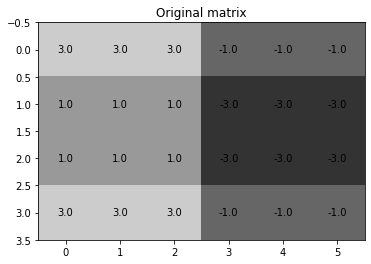

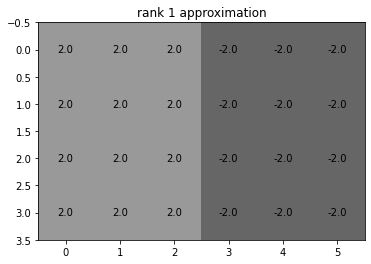

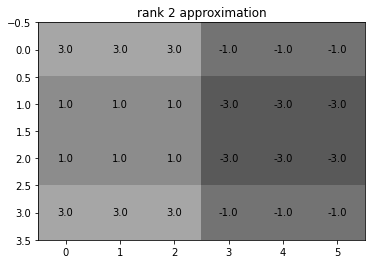

In [22]:
## display the original matrix using a heatmap 
plt.figure(num=None)
for (j,i),label in np.ndenumerate(A):
    plt.text(i,j,np.round(label,1),ha='center',va='center')
plt.imshow(A, vmin=-5, vmax=5, interpolation='none', cmap='gray')
plt.title('Original matrix' )

## display the rank-r approximations using a heatmap
for r in range(1,3):
    ## Fill in the blank: choose the first r colummns of U, first r singular values, etc...
    A_rank_r_approx = U[:,:r]@S_matrix[:r,:]@VT[:,:]
    plt.figure(num=None)
    for (j,i),label in np.ndenumerate(A_rank_r_approx):
        plt.text(i,j,np.round(label,1),ha='center',va='center')
    plt.imshow(A_rank_r_approx, vmin=-10, vmax=10, interpolation='none', cmap='gray')
    plt.title('rank ' + str(r) + ' approximation'  ) 

i) The economy SVD is based on the dimension of the matrices and does not consider the rank of the matrix.   What is the smallest economy SVD (minimum dimension of the square matrix $\boldsymbol{S}$) possible for the matrix $\boldsymbol{A}$?  Find $\boldsymbol{U}, \boldsymbol{S}$, and $\boldsymbol{V}$ for this minimal economy SVD.

In [23]:
 print(f'rank A = {np.linalg.matrix_rank(A)}' )
U =U[:,[0,1]]
S_matrix = S_matrix[:2,:2]
VT = VT[:2,:]
print(f'U = \n {U}')
print(f'S = \n {S_matrix}')
print(f'V = \n {VT.T}')
print(U@S_matrix@VT)
print('S is 2 by 2' )

rank A = 2
U = 
 [[-0.50 -0.50]
 [-0.50 0.50]
 [-0.50 0.50]
 [-0.50 -0.50]]
S = 
 [[9.80 0.00]
 [0.00 4.90]]
V = 
 [[-0.41 -0.41]
 [-0.41 -0.41]
 [-0.41 -0.41]
 [0.41 -0.41]
 [0.41 -0.41]
 [0.41 -0.41]]
[[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]
S is 2 by 2
